# Lab 4: EDA, missing Values and outliers

In [1]:
require(tidyverse)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Review of ggplot

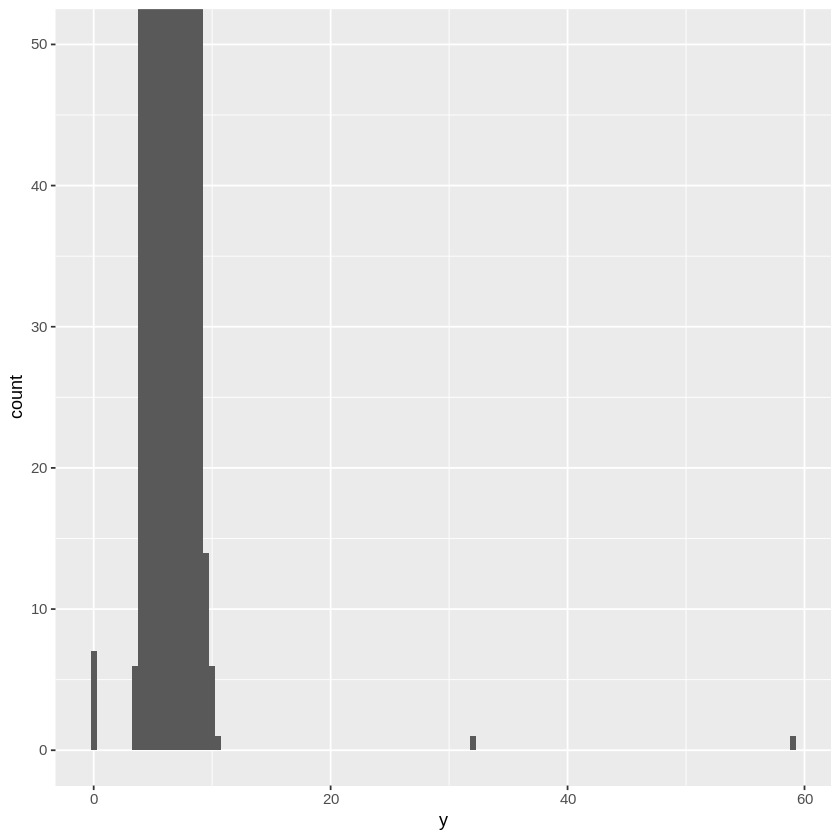

In [2]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

We had some unusual values at 0 and around 30 and 60. We have two options

1 Delete the rows that are outliers

In [3]:
diamonds2 = diamonds %>% 
  filter(between(y, 3, 20))

2 Replace the column with another one with missing unusual values

In [4]:
diamonds2 = diamonds %>% 
  mutate(y = ifelse(y < 3 | y > 20, NA, y))

diamonds2 %>% filter(y < 3 | y > 20)

carat,cut,color,clarity,depth,table,price,x,y,z


Warning message:
“Removed 9 rows containing missing values (geom_point).”

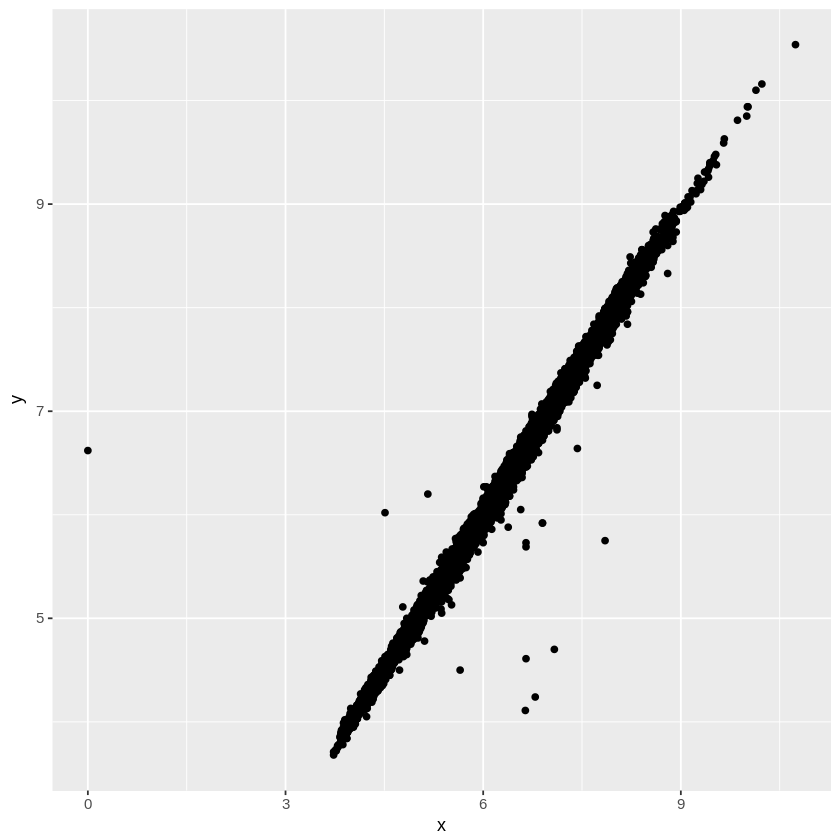

In [5]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point()

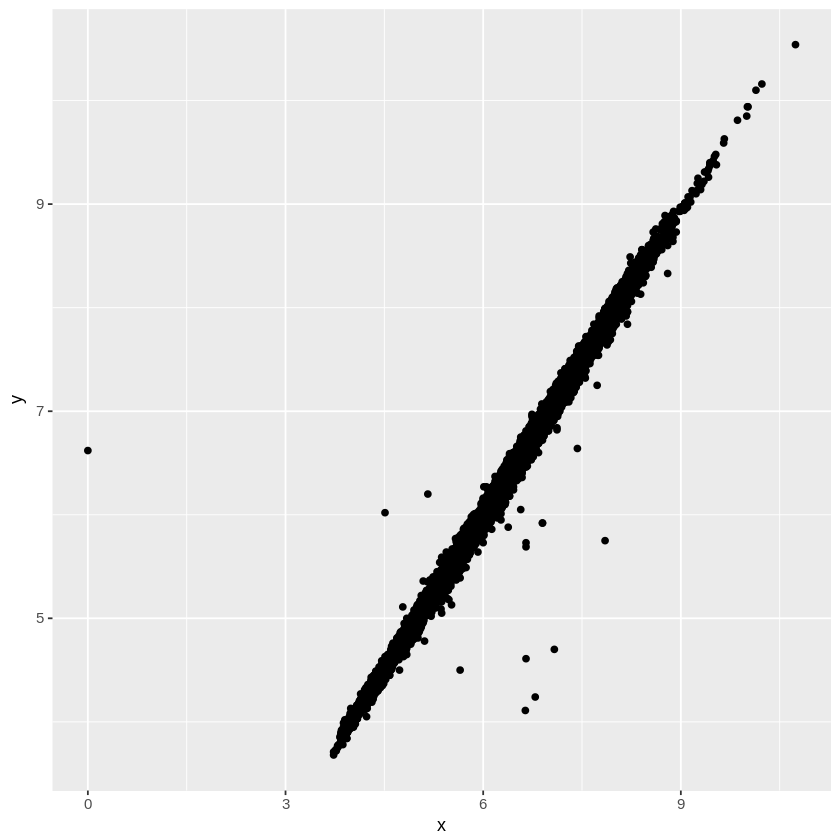

In [6]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point(na.rm = TRUE)

In the flights dataset, the dep_flights column is empty when the flight is canceled. Scheduled departure times for the canceled and non-canceled times could be of interest.

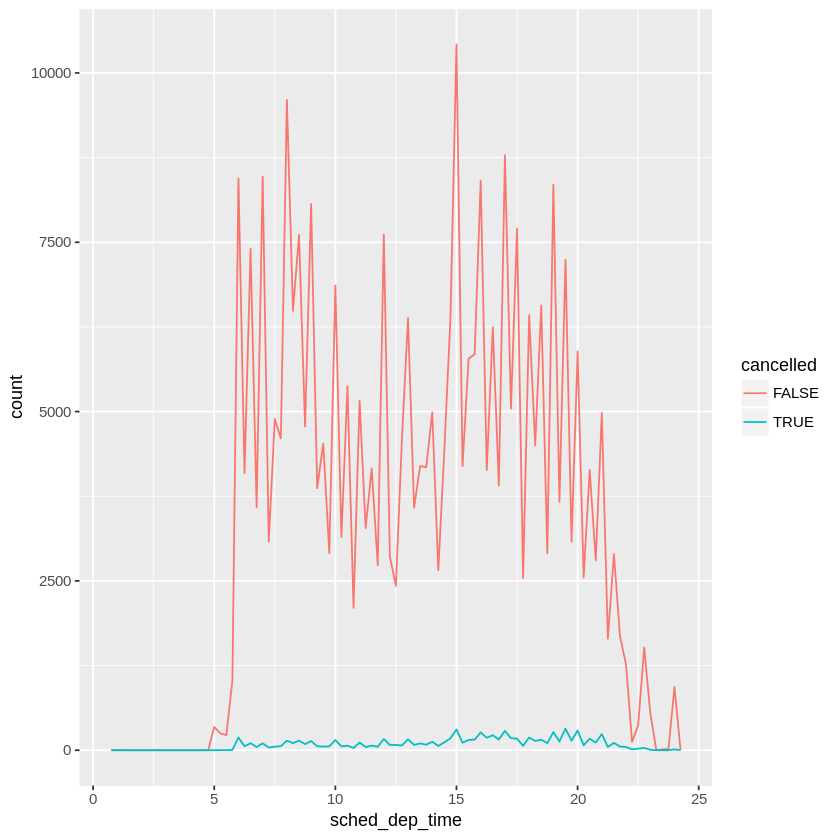

In [7]:
nycflights13::flights %>% 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>% 
  ggplot(mapping = aes(sched_dep_time)) + 
    geom_freqpoly(mapping = aes(colour = cancelled), binwidth = 1/4)

## Covariance
Covariation is the extent to which two variables tend to vary together. We can investigate covariance using our visualization toolkit.

### A categorical and continuous variable
We want to see the distribution of a continuous variable broken down by a categorical variable


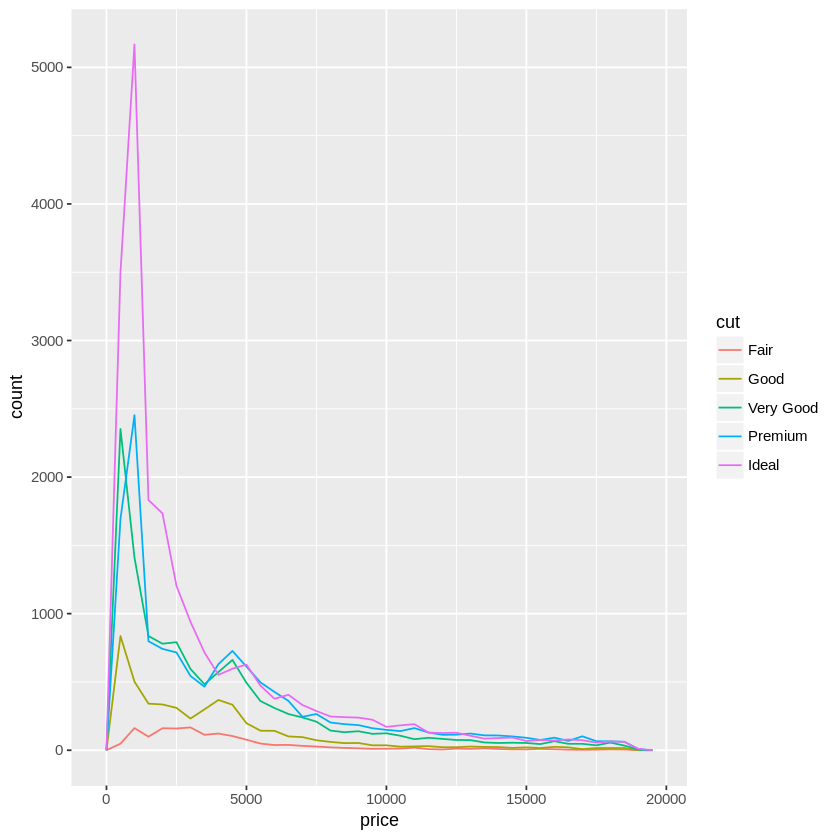

In [8]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

Hard to see difference among the distributions because there are so many more ideal diamonds in our datasets compared to, say, fair diamonds.

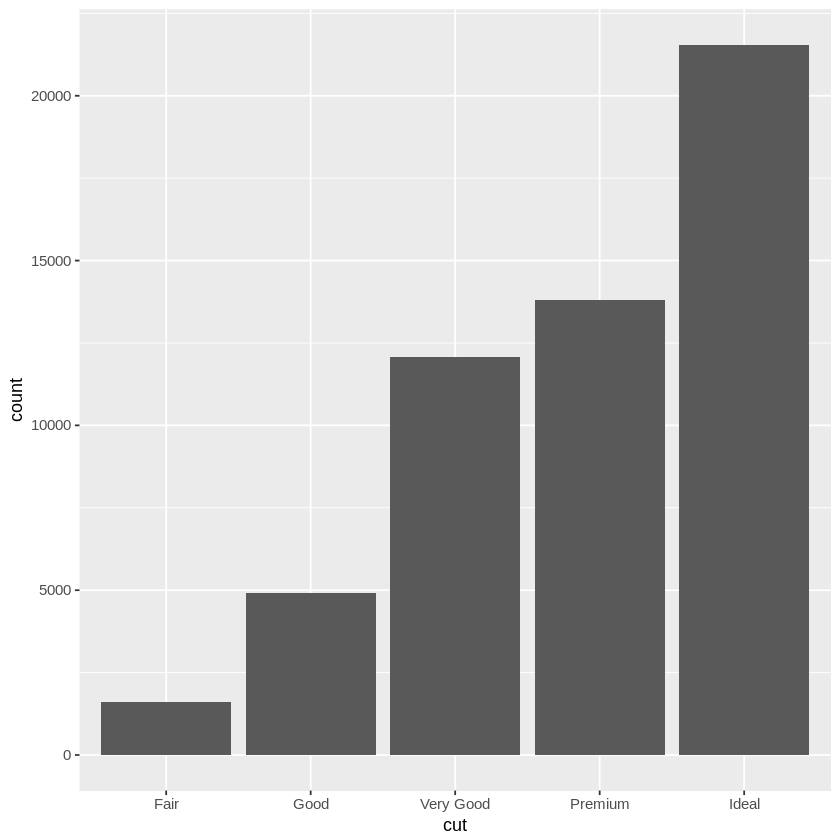

In [9]:
ggplot(diamonds) + 
  geom_bar(mapping = aes(x = cut))

Instead of having counts on the y-axis we need to plot densities. Densities are representations of the distribution which have to integrate to 1.

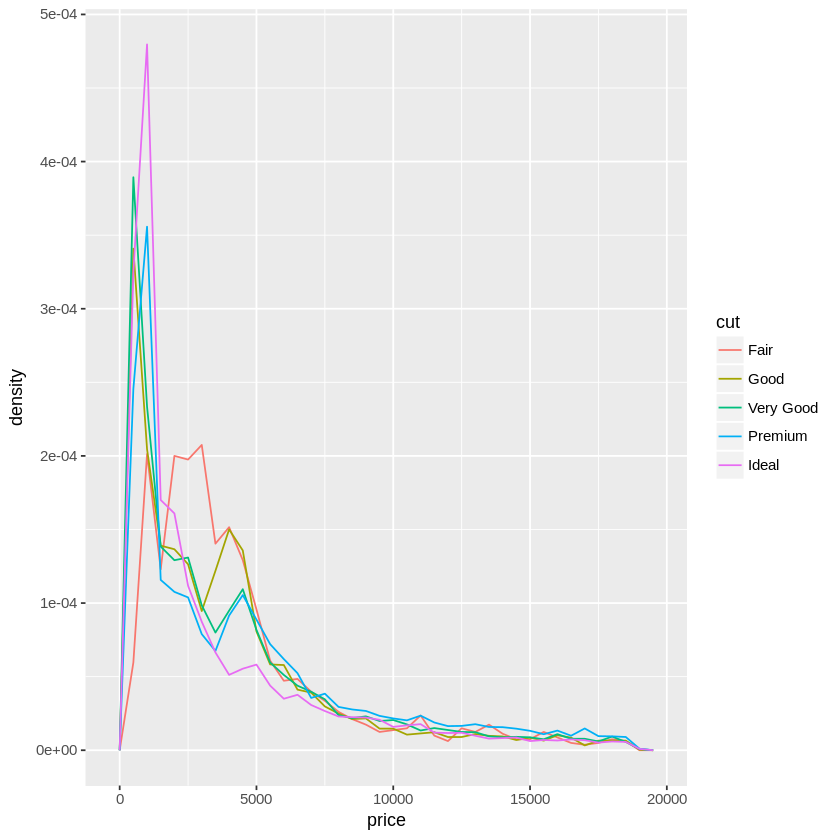

In [10]:
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

Looks like Fair diamonds have the highest average price?

Another way of examining the distribution of a continuous variable broken down by a categorical variable is by using boxplots.

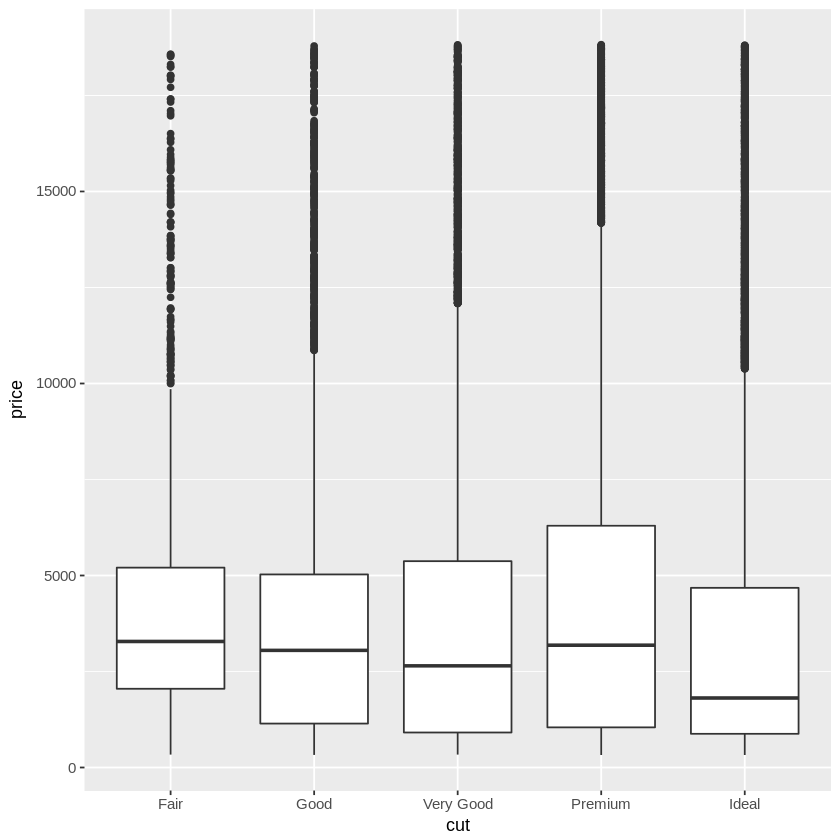

In [12]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

Looks like it does seem like Fair diamonds have higher median price than higher quality diamonds.

When visualizing boxplots, you can reorder the categorical variables in cases where the categories do not have an intrinsic ordering. For instance take the "class" column of the mpg dataset.

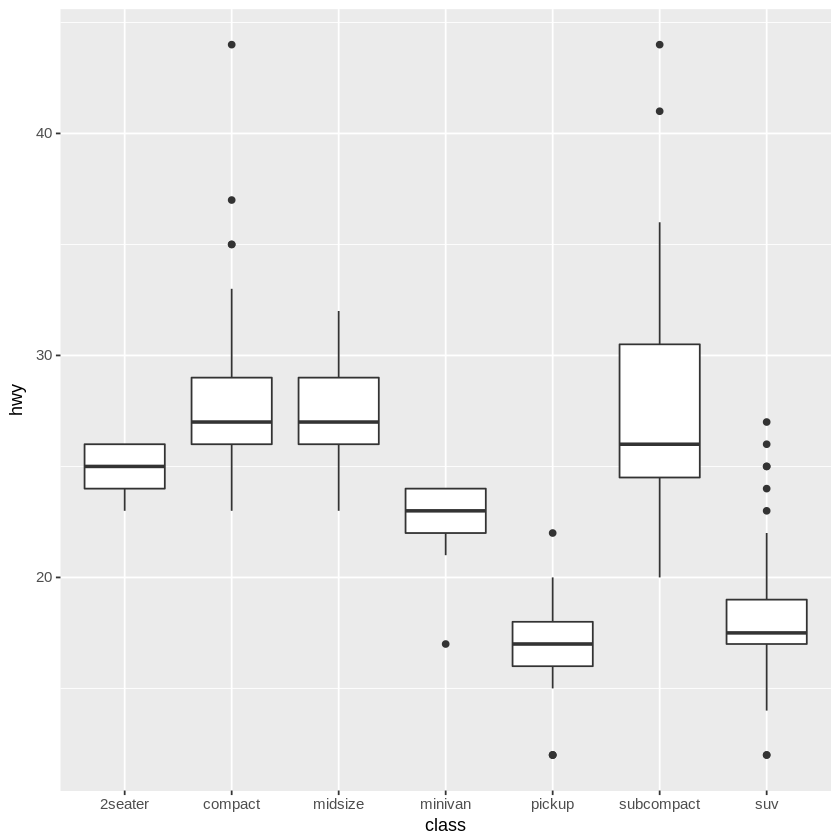

In [13]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()

We can order the class categories based on the median of each class

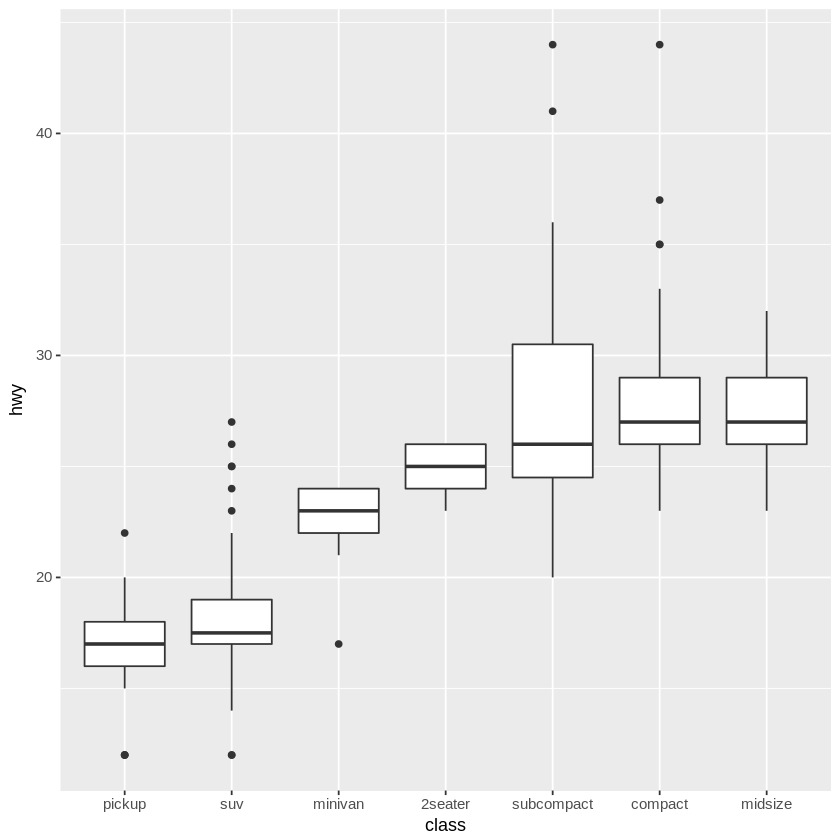

In [14]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  xlab('class')

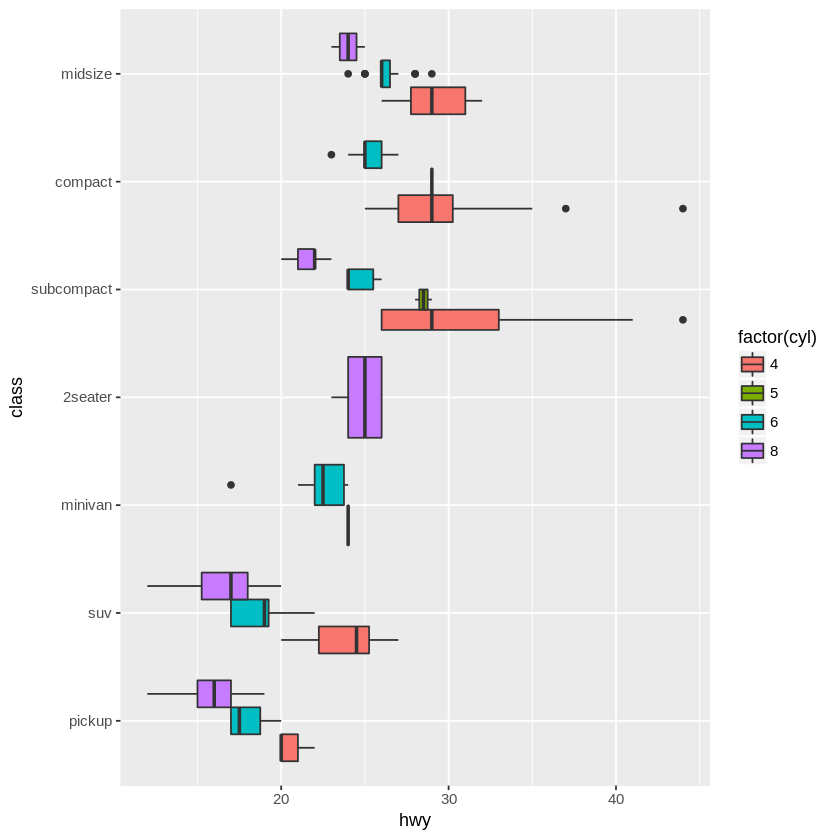

In [15]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy, fill = factor(cyl))) +
  coord_flip() + 
  xlab('class')

### Exercises
1 Use what you’ve learned to improve the visualisation of the departure times of cancelled vs. non-cancelled flights.

2 What variable in the diamonds dataset is most important for predicting the price of a diamond? How is that variable correlated with cut? Why does the combination of those two relationships lead to lower quality diamonds being more expensive?

### Two Categorical variables
To find the covariation between two categorical variables, use the geom_count method.

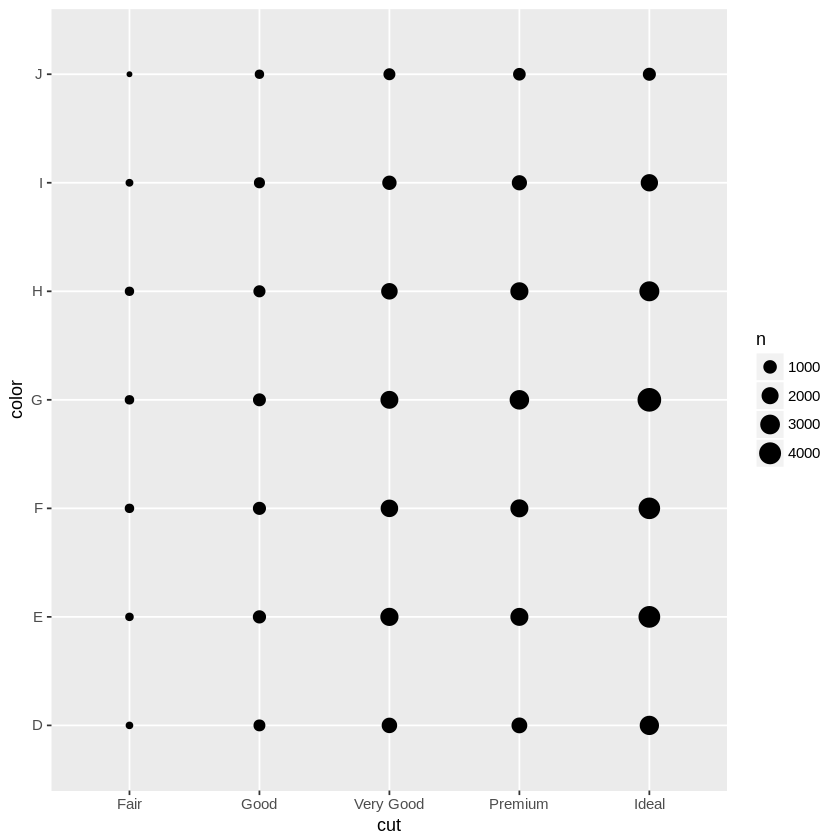

In [16]:
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

In [17]:
diamonds %>% 
  count(color, cut)

color,cut,n
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337
E,Ideal,3903


Then visualize using geom_tile and fill ( ) aesthetic.

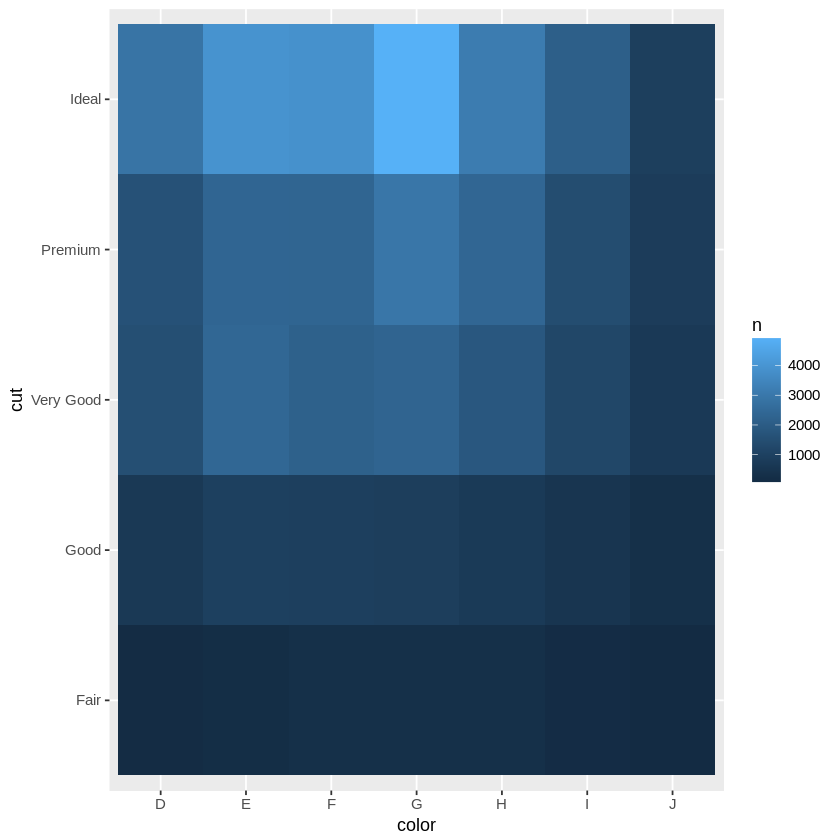

In [18]:
diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n))

### Exercises
1. Use geom_tile() together with dplyr to explore how average flight delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?

2. Why is it slightly better to use aes(x = color, y = cut) rather than aes(x = cut, y = color) in the example above?